<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/Classifica%C3%A7%C3%A3o_bin%C3%A1ria_Cancer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1: Classificação binária: Câncer de mama

## Etapa 1: Importação das bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# !pip install torch==1.4.0

import torch
torch.__version__


In [ ]:
import torch.nn as nn

## Etapa 2: Base de dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [ ]:
previsores.shape

In [ ]:
previsores.head()

In [ ]:
classe.head()

In [ ]:
np.unique(classe)

In [ ]:
 sns.countplot(classe['0']);

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size = 0.25)

In [ ]:
previsores_treinamento.shape

In [ ]:
classe_treinamento.shape

In [ ]:
previsores_teste.shape

In [ ]:
classe_teste.shape

## Etapa 3: Transformação dos dados para tensores


In [ ]:
type(previsores_treinamento)

In [ ]:
type(np.array(previsores_treinamento))

In [ ]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

In [ ]:

type(previsores_treinamento)

In [ ]:

type(classe_treinamento)

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [ ]:
type(dataset)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 4: Construção do modelo

In [ ]:
 # 30 -> 16 -> 16 -> 1
# (entradas + saida) / 2 = (30 + 1) / 2 = 16
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [ ]:
classificador.parameters

In [ ]:
criterion = nn.BCELoss() #Binary Cross Entropy Loss

In [ ]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## Etapa 5: Treinamento do modelo

In [28]:
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad()

    outputs = classificador(inputs) # classificador.forward(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    #print(loss)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 5.44077
Época   2: perda 1.61572
Época   3: perda 1.27111
Época   4: perda 1.22527
Época   5: perda 1.19481
Época   6: perda 1.16310
Época   7: perda 1.16480
Época   8: perda 1.15068
Época   9: perda 1.12336
Época  10: perda 1.12424
Época  11: perda 1.08099
Época  12: perda 1.09893
Época  13: perda 1.07530
Época  14: perda 1.08443
Época  15: perda 1.13997
Época  16: perda 1.07494
Época  17: perda 1.08882
Época  18: perda 1.04306
Época  19: perda 1.07964
Época  20: perda 1.04321
Época  21: perda 1.06220
Época  22: perda 1.11282
Época  23: perda 1.06123
Época  24: perda 1.00314
Época  25: perda 1.05587
Época  26: perda 1.00042
Época  27: perda 1.01152
Época  28: perda 1.00167
Época  29: perda 1.00211
Época  30: perda 0.98924
Época  31: perda 1.02455
Época  32: perda 0.98739
Época  33: perda 1.00291
Época  34: perda 1.00912
Época  35: perda 1.03670
Época  36: perda 1.06181
Época  37: perda 1.08788
Época  38: perda 0.98346
Época  39: perda 1.01909
Época  40: perda 1.02930


## Etapa 6: Visualização dos pesos

In [29]:
# 30 -> 16 -> 16 -> 1
params = list(classificador.parameters())

In [30]:
params

[Parameter containing:
 tensor([[-6.1117e-02,  1.0842e-02, -8.3451e-02,  7.3670e-02, -1.4103e-04,
           7.1735e-03,  1.6724e-04,  3.0778e-04, -1.4554e-01,  2.3041e-05,
           7.6860e-04,  5.7891e-02, -1.7100e-01, -1.1286e-01, -1.7372e-05,
           9.2535e-05, -1.3769e-01,  2.1168e-05,  3.4194e-05, -4.3480e-06,
           1.1655e-01,  2.8734e-02,  4.9158e-02,  1.6877e-01, -1.0013e-01,
           3.5644e-02, -7.7274e-02,  1.0043e-01,  1.7117e-01, -1.2664e-01],
         [ 1.8897e-01,  7.7857e-02,  2.9895e-01,  1.2622e-01, -3.7438e-02,
          -4.1179e-02, -1.1583e-01, -1.0469e-01,  5.9242e-03,  5.7507e-02,
           2.8247e-02, -5.9924e-02, -3.0952e-02,  1.7770e-01, -1.7899e-02,
          -5.7413e-02,  2.0035e-01,  7.5741e-02,  3.3918e-01, -1.7641e-02,
           2.1964e-01, -5.0753e-02,  2.0365e-01,  3.5049e-02,  2.8228e-02,
          -1.8649e-01, -2.7290e-01,  1.7580e-01, -9.5777e-02, -2.6468e-01],
         [-2.8255e-02, -2.5968e-02, -2.4523e-02, -2.3394e-02,  2.4482e-03,


In [31]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [32]:
print(pesos0)

Parameter containing:
tensor([[-6.1117e-02,  1.0842e-02, -8.3451e-02,  7.3670e-02, -1.4103e-04,
          7.1735e-03,  1.6724e-04,  3.0778e-04, -1.4554e-01,  2.3041e-05,
          7.6860e-04,  5.7891e-02, -1.7100e-01, -1.1286e-01, -1.7372e-05,
          9.2535e-05, -1.3769e-01,  2.1168e-05,  3.4194e-05, -4.3480e-06,
          1.1655e-01,  2.8734e-02,  4.9158e-02,  1.6877e-01, -1.0013e-01,
          3.5644e-02, -7.7274e-02,  1.0043e-01,  1.7117e-01, -1.2664e-01],
        [ 1.8897e-01,  7.7857e-02,  2.9895e-01,  1.2622e-01, -3.7438e-02,
         -4.1179e-02, -1.1583e-01, -1.0469e-01,  5.9242e-03,  5.7507e-02,
          2.8247e-02, -5.9924e-02, -3.0952e-02,  1.7770e-01, -1.7899e-02,
         -5.7413e-02,  2.0035e-01,  7.5741e-02,  3.3918e-01, -1.7641e-02,
          2.1964e-01, -5.0753e-02,  2.0365e-01,  3.5049e-02,  2.8228e-02,
         -1.8649e-01, -2.7290e-01,  1.7580e-01, -9.5777e-02, -2.6468e-01],
        [-2.8255e-02, -2.5968e-02, -2.4523e-02, -2.3394e-02,  2.4482e-03,
         -4.83

In [33]:
# 30 -> 16 -> 16 -> 1
bias0 = params[1]
bias0.shape

torch.Size([16])

In [34]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [35]:
bias1 = params[3]
bias1.shape

torch.Size([16])

## Etapa 7: Avaliação do modelo

In [36]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [37]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [38]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [39]:
type(previsores_teste)

torch.Tensor

In [40]:
previsoes = classificador.forward(previsores_teste)

In [41]:
previsoes

tensor([[9.9513e-01],
        [1.0000e+00],
        [4.7650e-01],
        [1.0000e+00],
        [4.0390e-05],
        [9.5113e-01],
        [9.8119e-01],
        [9.9999e-01],
        [8.3207e-01],
        [2.5404e-01],
        [1.0000e+00],
        [9.7957e-01],
        [9.1944e-01],
        [9.9232e-01],
        [8.8875e-01],
        [9.6189e-01],
        [9.9218e-01],
        [1.0000e+00],
        [2.0592e-01],
        [9.9921e-01],
        [4.1809e-11],
        [6.5122e-03],
        [9.1510e-01],
        [1.0000e+00],
        [8.8206e-01],
        [7.9449e-04],
        [6.4811e-01],
        [1.0000e+00],
        [2.3643e-05],
        [9.9706e-01],
        [2.5161e-01],
        [1.0000e+00],
        [9.5667e-01],
        [9.6297e-01],
        [5.8473e-01],
        [9.9722e-01],
        [2.5094e-01],
        [9.9916e-01],
        [1.0000e+00],
        [5.0961e-06],
        [3.3133e-03],
        [9.9701e-01],
        [7.2742e-08],
        [5.8812e-01],
        [2.4005e-06],
        [9

In [42]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [43]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [44]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.8741258741258742

In [45]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[40, 14],
       [ 4, 85]])

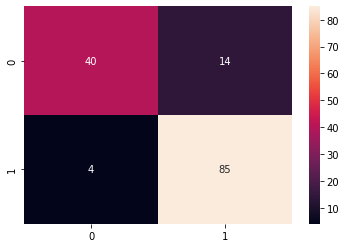

In [46]:
sns.heatmap(matriz, annot=True);

# Validação cruzada e Skorch

In [47]:
# importar o skorch , que é scikit learn + pytorch
!pip install skorch

In [48]:
from skorch import NeuralNetBinaryClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

# Criar a estrutura da rede neural

In [49]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    # self.output = nn.Sigmoid() 

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dense2(X)
    # X = self.output(X) 
    return X

# Skorch, convertendo de PyTorch + Sklearn

In [50]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [51]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss, # ** ATUALIZAÇÃO **
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

# Validação cruzada

In [52]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1    96846.8728  0.0949
      2    77311.9348  0.0832
      3    61014.5157  0.0886
      4    48012.4113  0.0847
      5    37804.0061  0.0822
      6    29768.0487  0.0965
      7    23366.1714  0.0840
      8    18213.9767  0.0816
      9    14017.9092  0.0922
     10    10531.9261  0.0888
     11     7549.8456  0.0838
     12     4892.3121  0.1003
     13     2392.8047  0.0999
     14      349.9506  0.0807
     15       72.8066  0.0801
     16       64.0642  0.0823
     17       55.9782  0.0801
     18       49.9750  0.0868
     19       41.6763  0.0801
     20       34.7018  0.0870
     21       29.5083  0.0803
     22       25.7502  0.0796
     23       24.1378  0.0839
     24       22.1750  0.0951
     25       22.0445  0.0795
     26       20.8348  0.0870
     27       21.0951  0.0883
     28       20.1159  0.0821
     29       18.9567  0.0808
     30       19.4074  0.0824
     31       18.8248  0.0778
     32   

In [53]:
resultados.shape

(10,)

In [54]:
resultados

array([0.80701754, 0.80701754, 0.66666667, 0.9122807 , 0.80701754,
       0.80701754, 0.9122807 , 0.9122807 , 0.8245614 , 0.85714286])

In [55]:
media = resultados.mean()
media

0.8313283208020051

In [56]:
desvio = resultados.std()
desvio

0.07060422171972054

# Adicionando a camada de Dropout

In [57]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.2)
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    # self.output = nn.Sigmoid() 

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)
    X = self.dense2(X)
    # X = self.output(X) 
    return X

In [58]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss, # ** ATUALIZAÇÃO **
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1    66583.2662  0.0889
      2    50180.3124  0.0904
      3    38177.0126  0.0884
      4    27919.7162  0.0889
      5    20249.3896  0.0899
      6    12721.2728  0.0876
      7     6711.0621  0.0912
      8     3574.7294  0.0952
      9     3523.6403  0.1061
     10     3210.6631  0.0881
     11     3102.7053  0.0848
     12     2516.2270  0.1022
     13     2719.4414  0.1064
     14     2577.8773  0.0905
     15     2408.4717  0.0949
     16     2078.3861  0.0946
     17     2016.7819  0.0905
     18     1624.7645  0.1005
     19     1710.2459  0.0928
     20     1573.8037  0.0980
     21     1477.7375  0.0932
     22     1435.3963  0.0914
     23     1440.4865  0.0884
     24     1328.5110  0.0972
     25     1238.5139  0.0976
     26      966.6223  0.0966
     27      969.9189  0.0892
     28      920.1372  0.0876
     29     1119.0867  0.1002
     30      973.2929  0.0975
     31      691.0039  0.0872
     32   

In [ ]:
media = resultados.mean()
desvio = resultados.std()
media, desvio

In [ ]:
resultados